# <i> Analysis Of Financial Crine Detection </i>
### <i> Load The Library Files </i>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


### <i> Load the Dataset </i>

In [2]:
df = pd.read_csv("Big_Black_Money_Dataset.csv")

In [3]:
df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


### <i> DataSet Overview </i>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [25]:
df.describe()

,Country,Amount (USD),Transaction Type,Person Involved,Industry,Destination Country,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.473000,1.712408e-16,2.012300,3160.769900,3.007600,4.520500,0.298300,5.684342e-17,4.469400,248.579100,2.498300,2013.124000,5.890400,15.499200
std,2.871671,1.000050e+00,1.410797,1824.136125,1.990763,2.873744,0.457535,1.000050e+00,2.879773,143.428444,1.693483,0.329598,3.646768,8.754705
min,0.000000,-1.749490e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.564356e+00,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,2.000000,-8.585399e-01,1.000000,1567.750000,1.000000,2.000000,0.000000,-8.731419e-01,2.000000,126.000000,1.000000,2013.000000,2.000000,8.000000
50%,4.000000,-3.561493e-04,2.000000,3171.500000,3.000000,4.000000,0.000000,1.636795e-01,4.000000,247.000000,3.000000,2013.000000,6.000000,15.000000
75%,7.000000,8.569857e-01,3.000000,4737.250000,5.000000,7.000000,1.000000,8.548938e-01,7.000000,373.000000,4.000000,2013.000000,9.000000,23.000000
max,9.000000,1.753849e+00,4.000000,6319.000000,6.000000,9.000000,1.000000,1.546108e+00,9.000000,498.000000,5.000000,2014.000000,12.000000,31.000000


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


## <i> Data Preprocessing </i>

In [6]:
# Converting 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Encoding categorical features using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['Country', 'Transaction Type', 'Person Involved', 'Industry', 
                    'Destination Country', 'Source of Money', 'Financial Institution', 
                    'Tax Haven Country']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Splitting Date features
df['Transaction Year'] = df['Date of Transaction'].dt.year
df['Transaction Month'] = df['Date of Transaction'].dt.month
df['Transaction Day'] = df['Date of Transaction'].dt.day

# Drop 'Date of Transaction' and 'Transaction ID' columns (not useful for model)
df = df.drop(['Date of Transaction', 'Transaction ID'], axis=1)

# Feature Scaling for numeric columns
scaler = StandardScaler()
df[['Amount (USD)', 'Money Laundering Risk Score']] = scaler.fit_transform(df[['Amount (USD)', 'Money Laundering Risk Score']])

# Define X and y for the model
X = df.drop('Reported by Authority', axis=1)  # Features
y = df['Reported by Authority']  # Target


## <i> Expolatory Data Analysis </i>

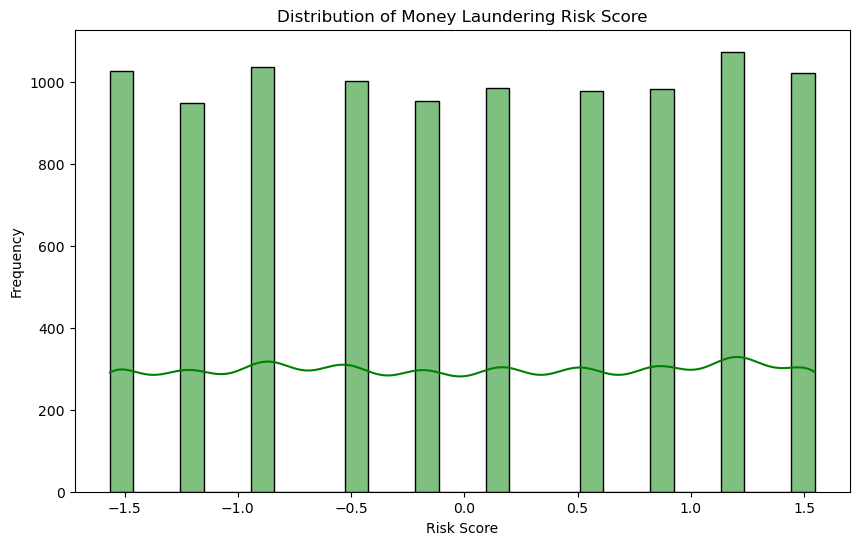

In [7]:
# Distribution of 'Money Laundering Risk Score'
plt.figure(figsize=(10,6))
sns.histplot(df['Money Laundering Risk Score'], kde=True, bins=30, color='green')
plt.title('Distribution of Money Laundering Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

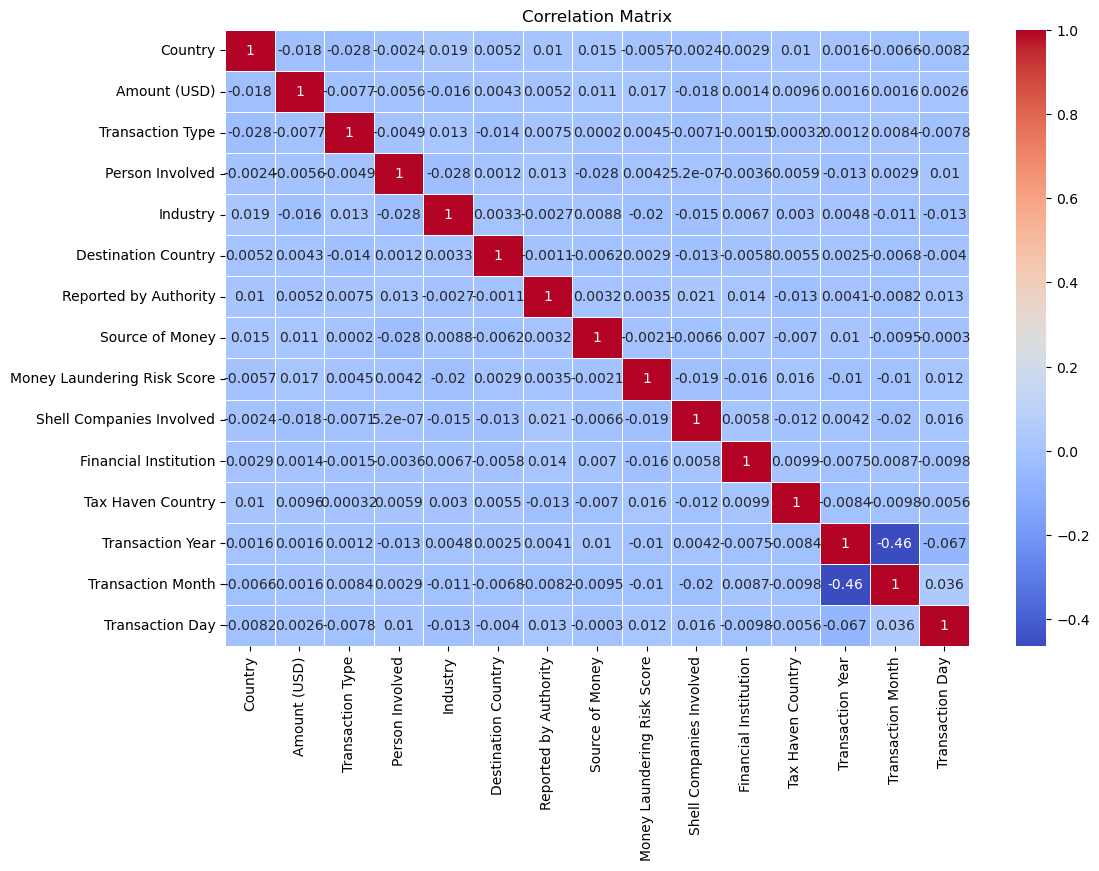

In [8]:
# Correlation heatmap
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

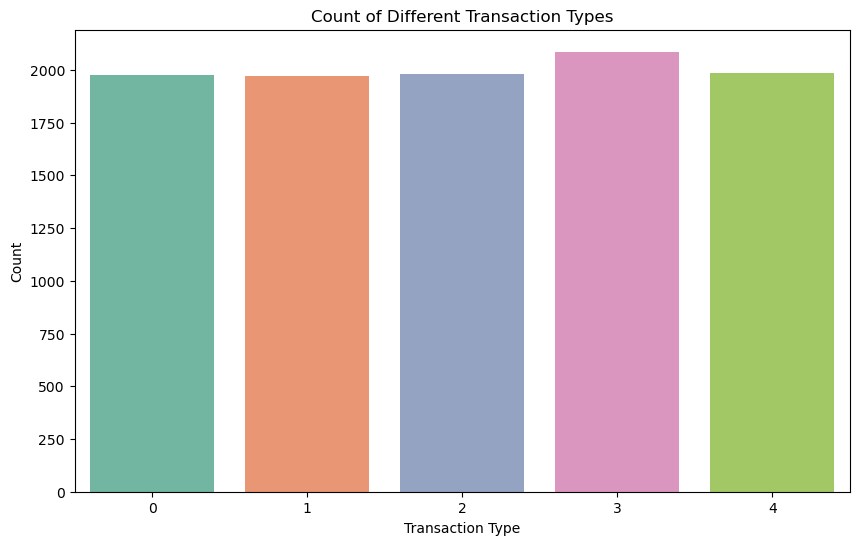

In [9]:
# Bar plot for Transaction Types
plt.figure(figsize=(10,6))
sns.countplot(x='Transaction Type', data=df, palette='Set2')
plt.title('Count of Different Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


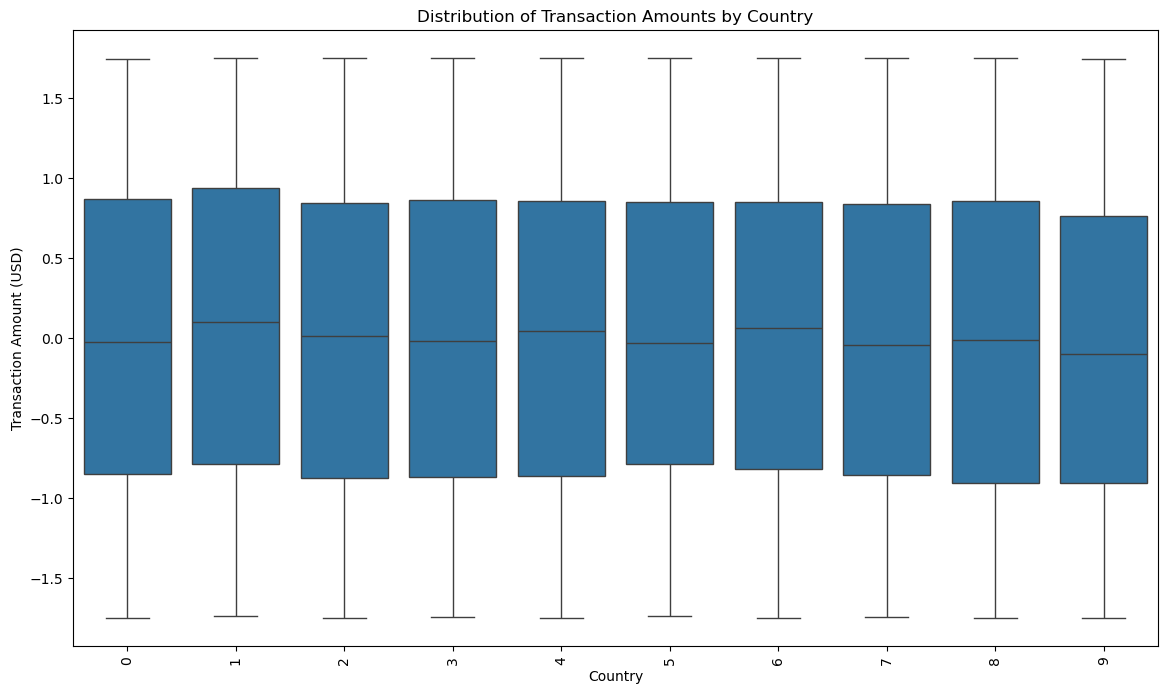

In [10]:
# Boxplot for Transaction Amount by Country
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Amount (USD)', data=df)
plt.title('Distribution of Transaction Amounts by Country')
plt.xticks(rotation=90)
plt.ylabel('Transaction Amount (USD)')
plt.xlabel('Country')
plt.show()


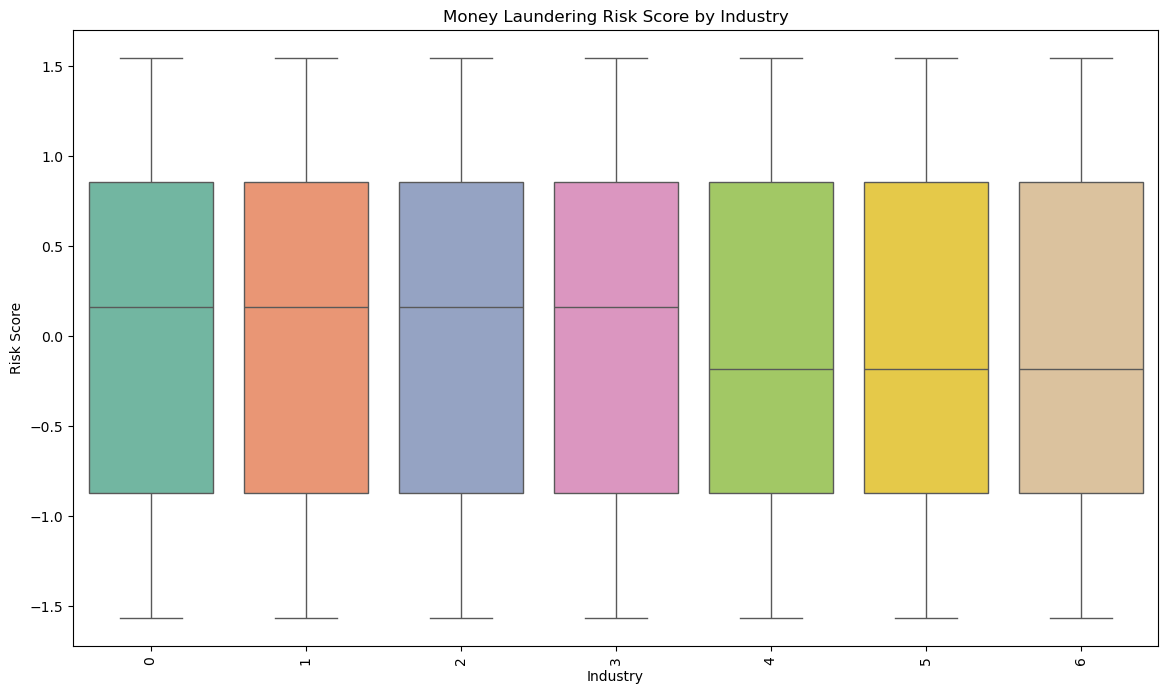

In [11]:
# Boxplot for Money Laundering Risk Score by Industry
plt.figure(figsize=(14, 8))
sns.boxplot(x='Industry', y='Money Laundering Risk Score', data=df, palette="Set2")
plt.title('Money Laundering Risk Score by Industry')
plt.xticks(rotation=90)
plt.ylabel('Risk Score')
plt.xlabel('Industry')
plt.show()


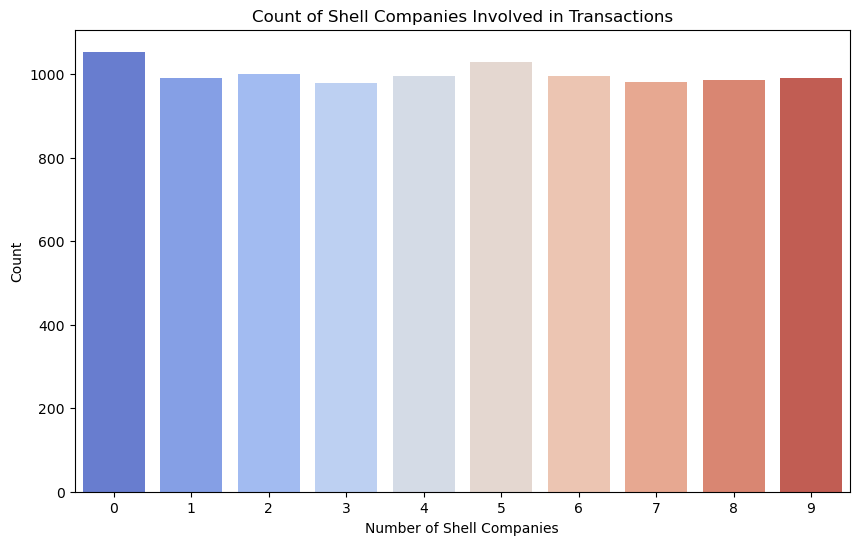

In [12]:
# Countplot of Shell Companies Involved
plt.figure(figsize=(10, 6))
sns.countplot(x='Shell Companies Involved', data=df, palette="coolwarm")
plt.title('Count of Shell Companies Involved in Transactions')
plt.xlabel('Number of Shell Companies')
plt.ylabel('Count')
plt.show()


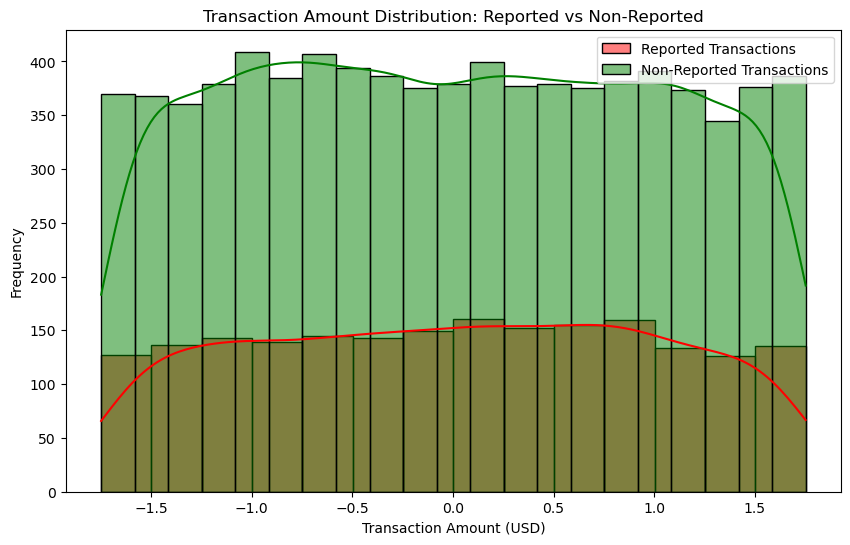

In [13]:
# Transaction Amount Distribution for Reported vs Non-Reported Transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Reported by Authority'] == True]['Amount (USD)'], color='red', label='Reported Transactions', kde=True)
sns.histplot(df[df['Reported by Authority'] == False]['Amount (USD)'], color='green', label='Non-Reported Transactions', kde=True)
plt.title('Transaction Amount Distribution: Reported vs Non-Reported')
plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


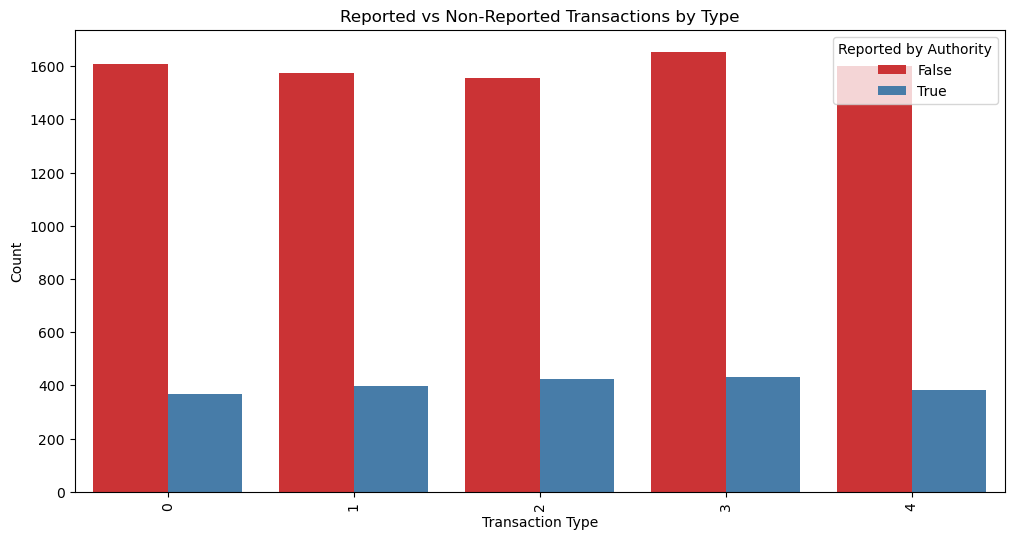

In [14]:
# Countplot of Reported Transactions by Transaction Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Transaction Type', hue='Reported by Authority', data=df, palette="Set1")
plt.title('Reported vs Non-Reported Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


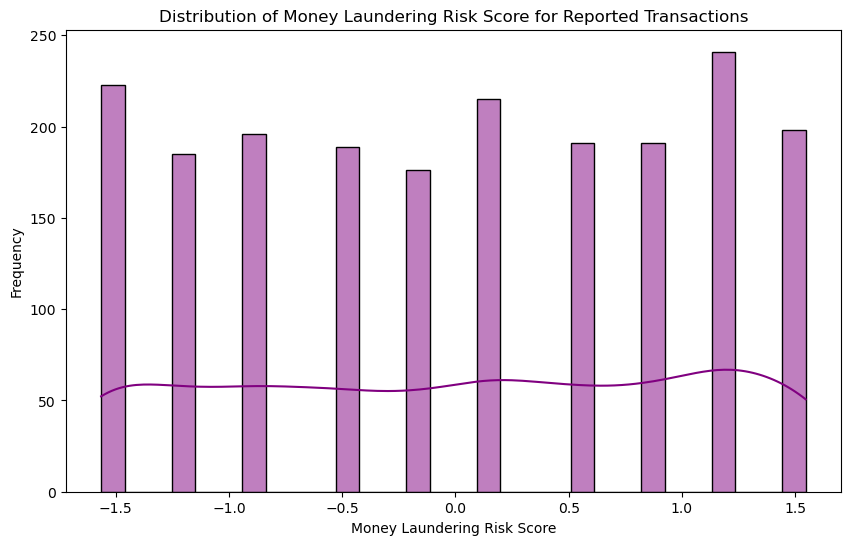

In [15]:
# Distribution of Money Laundering Risk Score for Reported Transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Reported by Authority'] == True]['Money Laundering Risk Score'], color='purple', kde=True, bins=30)
plt.title('Distribution of Money Laundering Risk Score for Reported Transactions')
plt.xlabel('Money Laundering Risk Score')
plt.ylabel('Frequency')
plt.show()


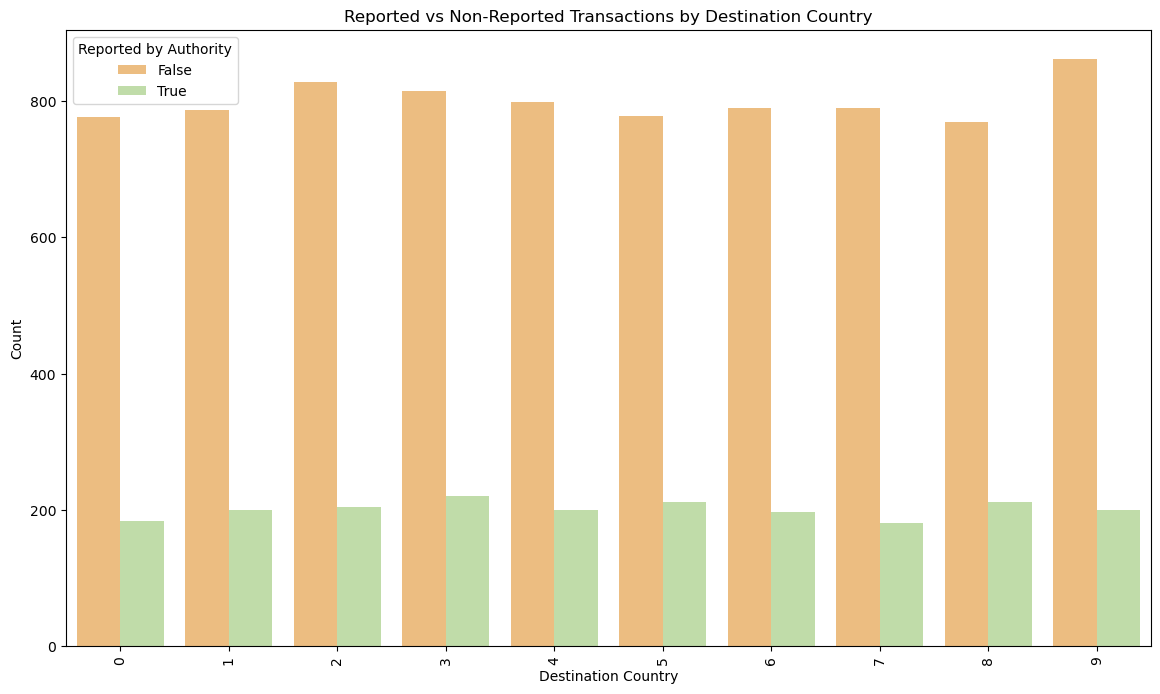

In [16]:
# Count of Reported Transactions by Destination Country
plt.figure(figsize=(14, 8))
sns.countplot(x='Destination Country', hue='Reported by Authority', data=df, palette="Spectral")
plt.title('Reported vs Non-Reported Transactions by Destination Country')
plt.xticks(rotation=90)
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.show()


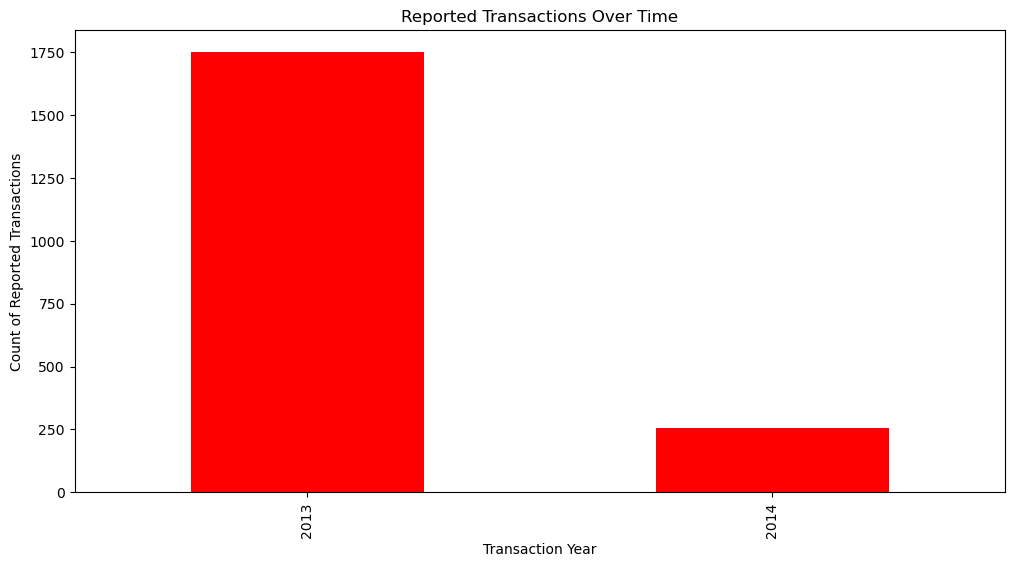

In [17]:
# Reported Transactions Over Time
plt.figure(figsize=(12, 6))
reported_over_time = df[df['Reported by Authority'] == True].groupby('Transaction Year').size()
reported_over_time.plot(kind='bar', color='red')
plt.title('Reported Transactions Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Count of Reported Transactions')
plt.show()


In [18]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# <i> Modeling </i>
## <i> Logistic Regression </i>

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.80      1.00      0.89      1602
        True       0.00      0.00      0.00       398

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



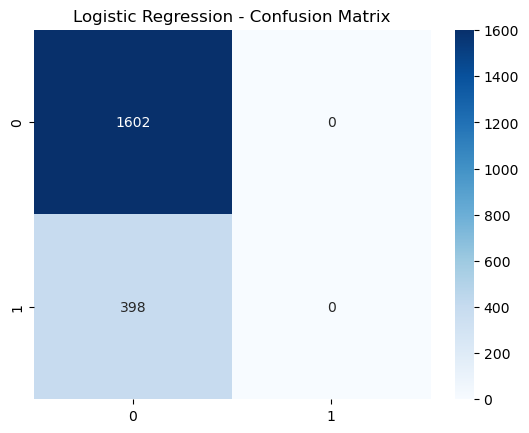

In [19]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


## <i> Random Forest </i>

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.80      1.00      0.89      1602
        True       0.00      0.00      0.00       398

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



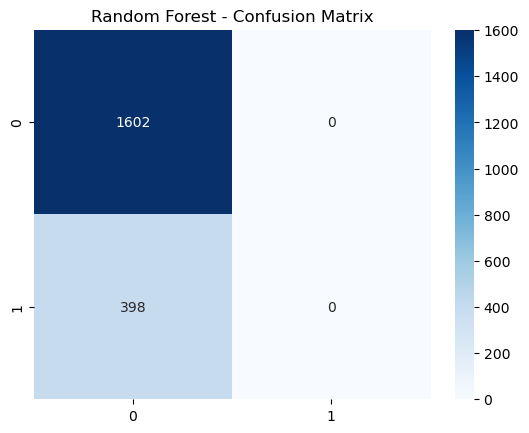

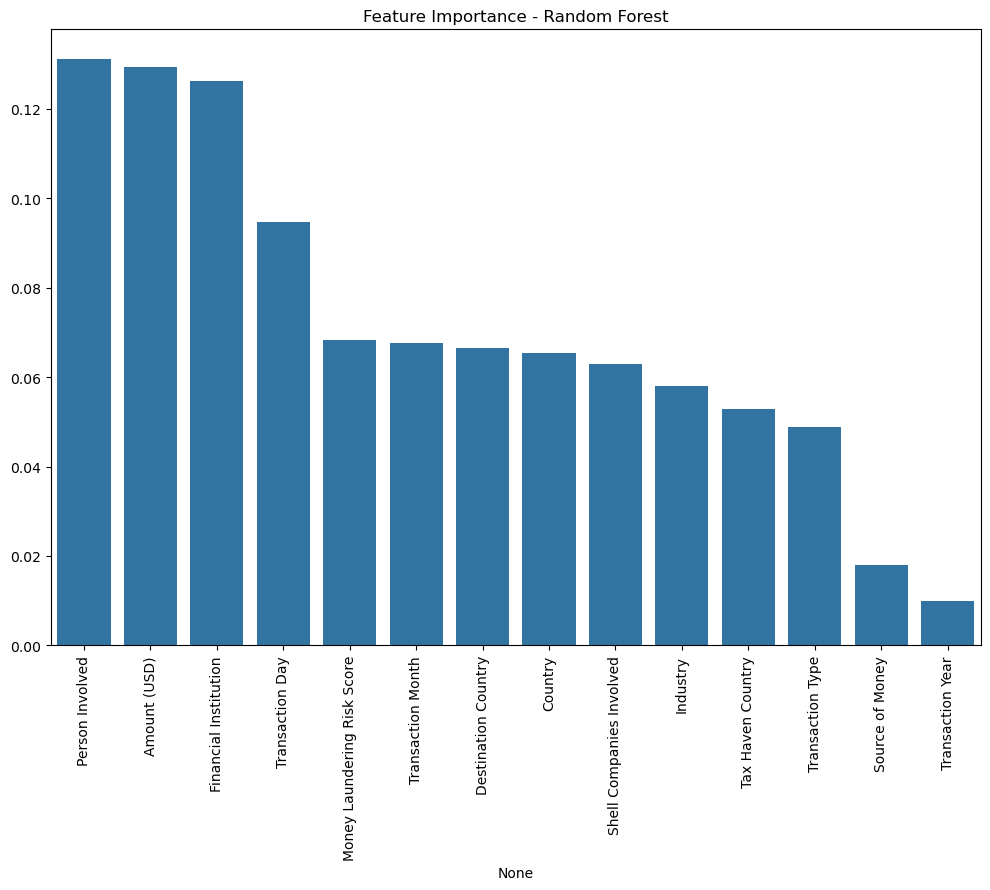

In [20]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=90)
plt.show()


## <i> XGBoost </i>

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.98      0.88      1602
        True       0.27      0.04      0.06       398

    accuracy                           0.79      2000
   macro avg       0.54      0.51      0.47      2000
weighted avg       0.70      0.79      0.72      2000



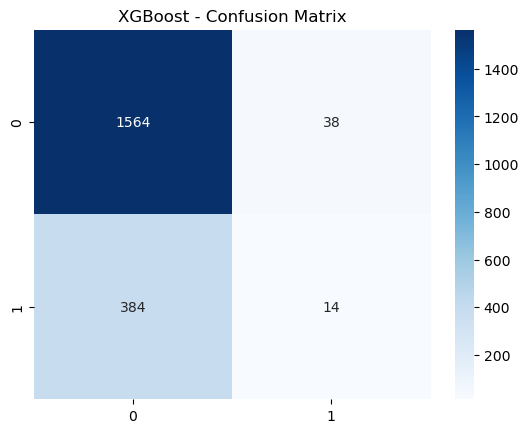

In [21]:
# XGBoost Model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost - Confusion Matrix')
plt.show()


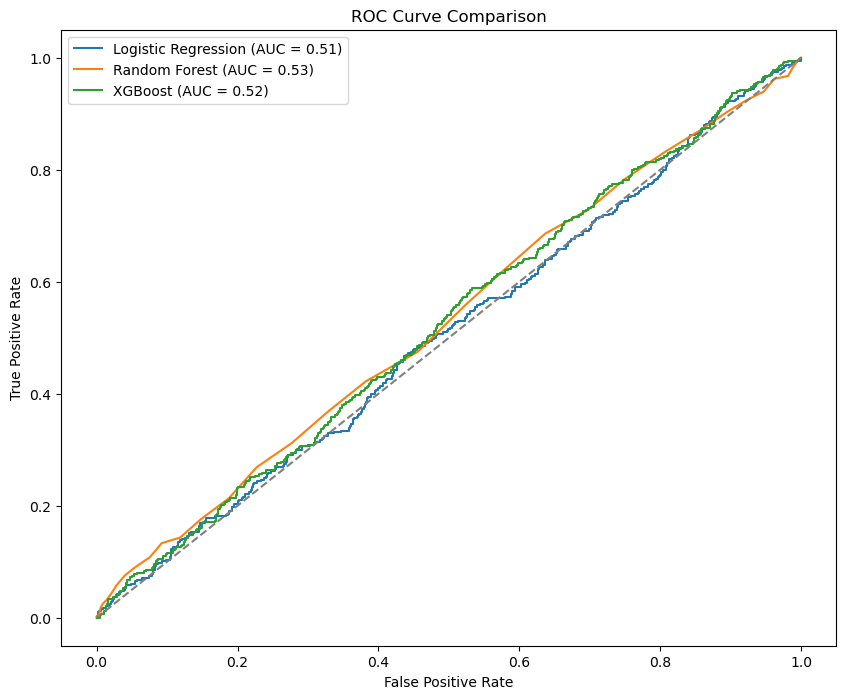

In [22]:
# Calculate ROC curves
y_pred_prob_log = log_reg.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
y_pred_prob_xgb = xgb.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_log))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_xgb))
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate models
def evaluate_model(model_name, y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f"----- {model_name} Performance -----")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\n")
    
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 
            'Recall': recall, 'F1 Score': f1, 'AUC': auc}


In [24]:
# Predictions and probabilities for Logistic Regression
y_pred_log = log_reg.predict(X_test)
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Predictions and probabilities for Random Forest
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Predictions and probabilities for XGBoost
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate models
results_log = evaluate_model("Logistic Regression", y_test, y_pred_log, y_pred_prob_log)
results_rf = evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_prob_rf)
results_xgb = evaluate_model("XGBoost", y_test, y_pred_xgb, y_pred_prob_xgb)

# Collect results
model_comparison = pd.DataFrame([results_log, results_rf, results_xgb])


----- Logistic Regression Performance -----
Accuracy: 0.8010
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.5064


----- Random Forest Performance -----
Accuracy: 0.8010
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.5285


----- XGBoost Performance -----
Accuracy: 0.7890
Precision: 0.2692
Recall: 0.0352
F1 Score: 0.0622
AUC: 0.5237


